In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
vel=np.loadtxt('vel.txt')/1000

In [3]:
vel

array([  17.49924188,   16.67478186,   15.85032184,   15.02586182,
         14.2014018 ,   13.37694178,   12.55248176,   11.72802174,
         10.90356172,   10.0791017 ,    9.25464168,    8.43018166,
          7.60572164,    6.78126162,    5.9568016 ,    5.13234158,
          4.30788156,    3.48342154,    2.65896152,    1.8345015 ,
          1.01004148,    0.18558146,   -0.63887856,   -1.46333858,
         -2.2877986 ,   -3.11225862,   -3.93671864,   -4.76117866,
         -5.58563868,   -6.4100987 ,   -7.23455872,   -8.05901874,
         -8.88347876,   -9.70793878,  -10.5323988 ,  -11.35685882,
        -12.18131884,  -13.00577886,  -13.83023888,  -14.6546989 ,
        -15.47915892,  -16.30361894,  -17.12807896,  -17.95253898,
        -18.776999  ,  -19.60145902,  -20.42591904,  -21.25037906,
        -22.07483908,  -22.8992991 ,  -23.72375912,  -24.54821914,
        -25.37267916,  -26.19713918,  -27.0215992 ,  -27.84605922,
        -28.67051924,  -29.49497926,  -30.31943928,  -31.14389

In [4]:
a=np.loadtxt('21cmsurvey.txt')

In [5]:
a

array([[147.30999969, 147.2599997 , 147.2099997 , ..., 142.31000029,
        142.2600003 , 142.2100003 ],
       [  6.58721924,   2.61897659,   4.62152481, ...,  16.77196693,
          5.34023285,  -4.89979935],
       [  4.89794922,   4.09938812,   6.3906498 , ...,  12.4474411 ,
         26.54514694,  -1.38612366],
       ...,
       [ -4.05209732,   4.64609528,  -0.44013596, ...,   2.47769165,
          2.17669296,   7.57006454],
       [ -2.1416893 ,   1.31056213,  -0.21285248, ...,   4.66452408,
         13.81114197,   3.06739807],
       [ -0.8394165 ,   1.40884399,   0.7392807 , ...,  20.06450272,
          8.66962433,  19.75736237]])

In [6]:
spgr=a[1:]

In [7]:
spgr

array([[ 6.58721924,  2.61897659,  4.62152481, ..., 16.77196693,
         5.34023285, -4.89979935],
       [ 4.89794922,  4.09938812,  6.3906498 , ..., 12.4474411 ,
        26.54514694, -1.38612366],
       [ 2.44697571,  8.08605957,  9.35147476, ..., 15.63554955,
        13.97085381,  8.17820168],
       ...,
       [-4.05209732,  4.64609528, -0.44013596, ...,  2.47769165,
         2.17669296,  7.57006454],
       [-2.1416893 ,  1.31056213, -0.21285248, ...,  4.66452408,
        13.81114197,  3.06739807],
       [-0.8394165 ,  1.40884399,  0.7392807 , ..., 20.06450272,
         8.66962433, 19.75736237]])

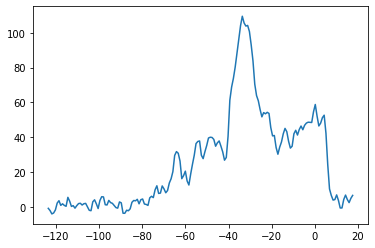

In [8]:
plt.plot(vel,spgr[:,0])

In [9]:
def gauss(x, *p):
    A, mu, sigma = p
    return A*np.exp(-(x-mu)**2/(2.*sigma**2))

In [10]:
x=vel
y=spgr[:,0]

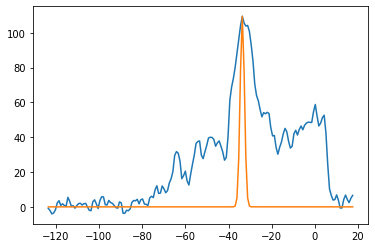

In [11]:
g1=gauss(x, y.max(),x[np.argmax(y)],1)
hist_fit = g1

plt.plot(x, y, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')

In [12]:
x[np.argmax(y)]

-33.61727936

In [13]:
lon=147.3*np.pi/180
8*(225*np.sin(lon))/(-33.6+225*np.sin(lon))

11.056140478311788

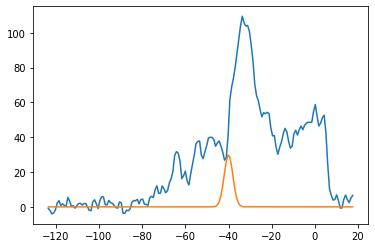

In [14]:
g1=gauss(x, 30,-40,2)

hist_fit = g1

plt.plot(x, y, label='Test data')
plt.plot(x, hist_fit, label='Fitted data')

In [15]:
np.trapz(hist_fit, dx=dv)

NameError: name 'dv' is not defined

In [18]:
from lmfit.models import ExponentialModel, GaussianModel

In [23]:
gauss1 = GaussianModel(prefix='g1_')
pars=gauss1.make_params()

pars['g1_center'].set(value=-30, min=-45, max=-20)
pars['g1_sigma'].set(value=2, min=1,max=10)
pars['g1_amplitude'].set(value=1000, min=20,max=3000)
                         
#gauss2 = GaussianModel(prefix='g2_')
#pars.update(gauss2.make_params())                        

In [24]:
mod = gauss1

In [25]:
init = mod.eval(pars, x=x)
out = mod.fit(y, pars, x=x)

print(out.fit_report(min_correl=0.5))

[[Model]]
    Model(gaussian, prefix='g1_')
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 64
    # data points      = 172
    # variables        = 3
    chi-square         = 63841.2914
    reduced chi-square = 377.759121
    Akaike info crit   = 1023.66569
    Bayesian info crit = 1033.10817
[[Variables]]
    g1_amplitude:  2307.58934 +/- 128.694461 (5.58%) (init = 1000)
    g1_center:    -31.3296150 +/- 0.64394406 (2.06%) (init = -30)
    g1_sigma:      10.0000000 +/- 0.10711726 (1.07%) (init = 2)
    g1_fwhm:       23.5482000 +/- 0.25224188 (1.07%) == '2.3548200*g1_sigma'
    g1_height:     92.0595001 +/- 4.63524099 (5.04%) == '0.3989423*g1_amplitude/max(1e-15, g1_sigma)'
[[Correlations]] (unreported correlations are < 0.500)
    C(g1_amplitude, g1_sigma) =  0.577


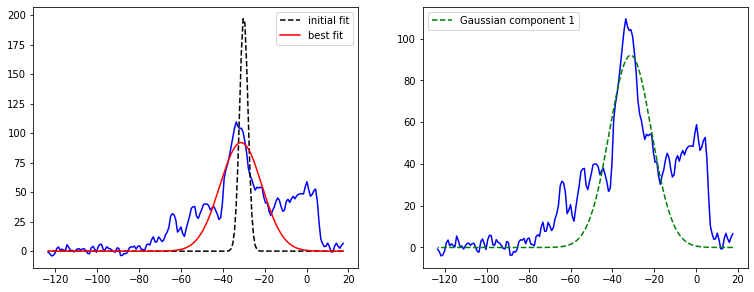

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(12.8, 4.8))
axes[0].plot(x, y, 'b')
axes[0].plot(x, init, 'k--', label='initial fit')
axes[0].plot(x, out.best_fit, 'r-', label='best fit')
axes[0].legend(loc='best')

comps = out.eval_components(x=x)
axes[1].plot(x, y, 'b')
axes[1].plot(x, comps['g1_'], 'g--', label='Gaussian component 1')


axes[1].legend(loc='best')